In [2]:
import casatasks as ctask
import casatools as ctool
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube as sc
import astropy.units as U
import warnings
warnings.filterwarnings('ignore')

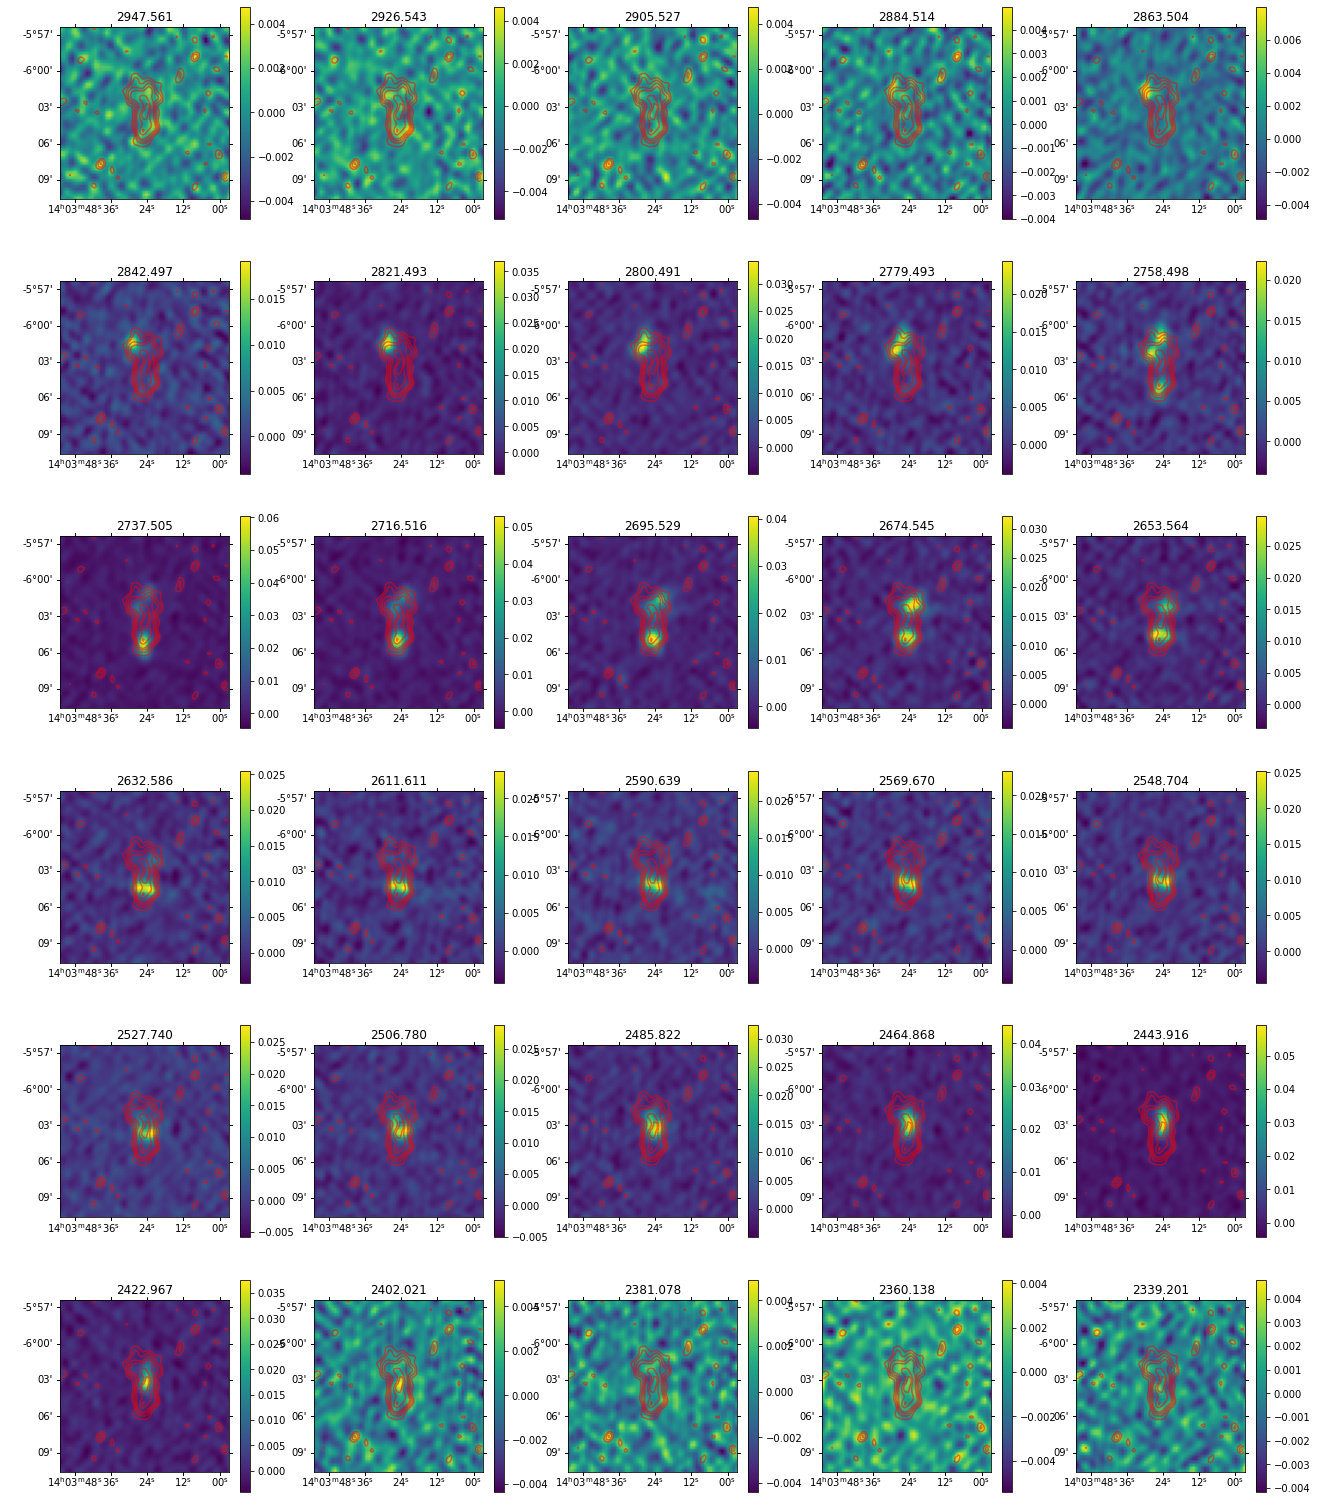

In [34]:
path="G1-data/VLA/"
cubeim=path+'J1403-box.image.fits'
newcube=sc.read(cubeim)
velcube=newcube.with_spectral_unit(unit=U.km/U.s, velocity_convention='optical',rest_value=1.420405745510*U.GHz) #Converting cube to vel scale
vel_rad=velcube.spectral_axis

velcube_chan=velcube[15:47,:,:]
mom0=velcube_chan.moment(order=0) #Moment 0 with Spectral Cube
#mom0.write('J1403-box.mom0.fits', overwrite=True)

levels =[1.15, 1.76, 2.37, 3.07, 4.8, 5.52]

chan = np.arange(16,46,1)
plt.figure(figsize=(22,32))
for ii, i in enumerate(chan):
    ax = plt.subplot(7,5,ii+1, projection=newcube[0].wcs)
    im=ax.imshow(fits.getdata(cubeim)[0,i,:,:])
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    plt.colorbar(im)
    ax.set_title('%.3f'%(vel_rad[i].value)) 
    ax.contour(mom0.data, colors=['red'], alpha=0.5, levels=levels)


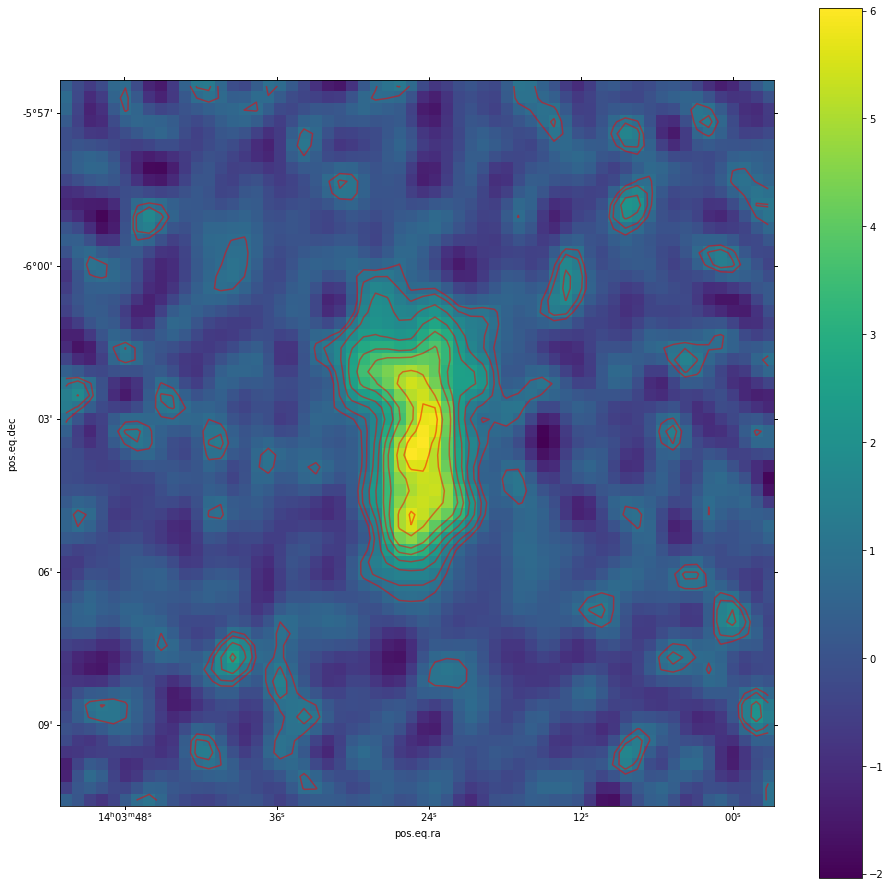

In [36]:
plt.figure(figsize=(16,16))
mo=plt.subplot(1,1,1,projection=velcube[0].wcs)
mom0plt=mo.imshow(mom0.data)
plt.colorbar(mom0plt,ax=mo)

levels =[0.8, 1.15, 1.76, 2.37, 3.07, 3.71, 4.88, 5.52]
mo.contour(mom0.data, colors=['red'], alpha=0.5, levels=levels)


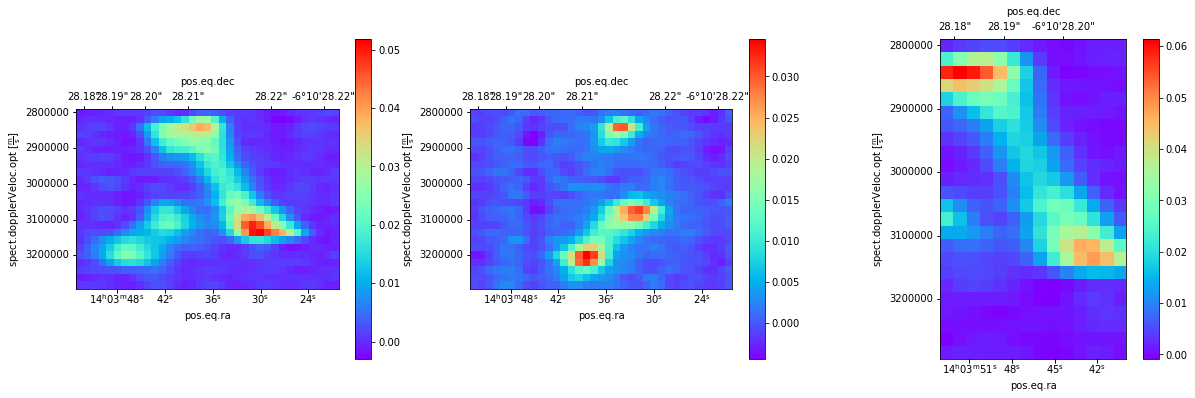

In [38]:
#PV Slice extractor and SpectralCube

from pvextractor import extract_pv_slice
from pvextractor.geometry import Path

fit=sc.read(cubeim).with_spectral_unit(unit=U.km/U.s, velocity_convention='optical',rest_value=1.420405745510*U.GHz)

g1 = [(27,47),(31,12)]
s1 = [(10,37),(45,37)]
s2 = [(31,34),(27,20)]
xyg1 = Path(g1)
xys1= Path(s1)
xys2 = Path(s2)
pvg1 = extract_pv_slice(fit[19:43,:,:], xyg1)
pvs1 = extract_pv_slice(fit[19:43,:,:], xys1)
pvs2 = extract_pv_slice(fit[19:43,:,:], xys2)

#pv.writeto(path+'my_slice.fits',) 

plt.figure(figsize=(20,20))
ag1 = plt.subplot(3,3,1,projection=fit.wcs,slices=('x',0,'y'))
pvg1im=ag1.imshow(pvg1.data, cmap='rainbow')
plt.colorbar(pvg1im)

as1 = plt.subplot(3,3,2,projection=fit.wcs, slices=('x',0,'y'))
pvs1im=as1.imshow(pvs1.data, cmap='rainbow')
plt.colorbar(pvs1im)
as2 = plt.subplot(3,3,3,projection=fit.wcs, slices=('x',0,'y'))
pvs2im=as2.imshow(pvs2.data, cmap='rainbow')
plt.colorbar(pvs2im)


[ 0.0000000e+00  1.3836611e-05  2.8779044e-05  2.5816120e-05
  6.2712129e-06  6.8505426e-05  4.8755395e-05  1.9725143e-05
  9.4899469e-06  9.4804534e-05  6.0651699e-05  8.6332868e-05
  1.0091105e-04  7.7817858e-05  8.7023211e-05  8.7115477e-05
  9.2896837e-05  2.7782533e-05  3.2585922e-05  7.8009056e-05
  1.7363709e-04  2.6367459e-04  3.3610981e-04  3.7603462e-04
  4.4125164e-04  5.4180587e-04  8.6420221e-04  8.4571505e-04
  8.7809179e-04  7.9245149e-04  6.3453394e-04  3.9719322e-04
  2.9809918e-04  3.4760620e-04  2.4615775e-04  3.0761756e-04
  2.9768507e-04  4.0830625e-04  4.0378480e-04  4.8291605e-04
  5.5939989e-04  2.9763809e-04  8.2498023e-05  8.5973043e-05
  3.7791793e-05  6.1791898e-06  2.0023925e-05  8.5830892e-05
  2.8809140e-05  4.9149297e-05  3.1892487e-05  5.5324221e-05
  8.0241873e-05 -9.2263272e-06  2.9688686e-05 -9.3008630e-06
  5.0456292e-05  5.1793642e-05  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00] Jy / beam


ValueError: Invalid slice

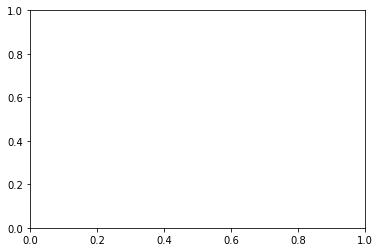

In [42]:
#Extract Spectrum

spec = fit.mean(axis=(1,2))  
print(spec)
plt.figure()
plt.plot(fit.spectral_axis,spec)
plt.show()

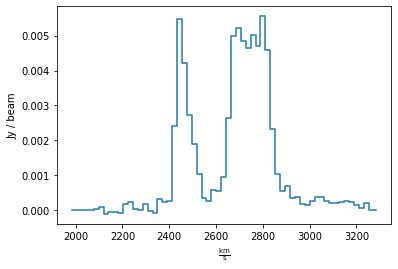

In [11]:
## Masked Spectrum Extraction -G1S1
import regions
#crtf_g1s1 = 'circle[[14:03:26.09, -06:01:01.75], 128"], coord=J2000'

ds9_g1s1 = 'J2000; circle(14:03:26.08764,-06:01:01.7474, 126")'  
cubeg1s1 = fit.subcube_from_ds9region(ds9_g1s1)
#cubeg1s1[25,:,:].quicklook()
specg1s1 = cubeg1s1.mean(axis=(1, 2))
specg1s1.quicklook()

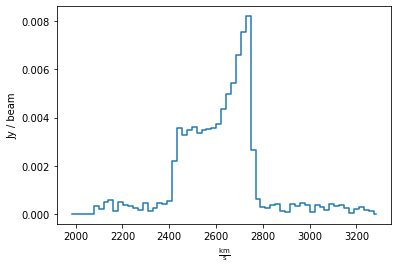

In [12]:
## Masked Spectrum Extraction -G1S2

ds9_g1s2 = 'J2000; circle(14:03:25.15795,-006:05:02.4656, 126")'  
cubeg1s2 = fit.subcube_from_ds9region(ds9_g1s2)  
#cubeg1s2[25,:,:].quicklook()
specg1s2 = cubeg1s2.mean(axis=(1, 2))
specg1s2.quicklook()

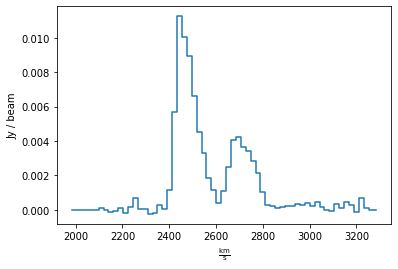

In [13]:
## Masked Spectrum Extraction -G1-bridge

bridgeg1 = regions.RectanglePixelRegion(regions.PixCoord(29.45, 31.96), width=21.76, height=2.43)  
cubeg1b = fit.subcube_from_regions([bridgeg1])
#cubeg1b[25,:,:].quicklook()
specg1b = cubeg1b.mean(axis=(1, 2)) 
specg1b.quicklook()

In [14]:
#Moment 1 for S1 and S2 using spectral cube - Need to add threshold cut off to eliminate effect of noise

"""g1s1_chan=cubeg1s1.spectral_slab(2346*U.km/U.s,2765*U.km/U.s) #channel cuts
mom1s1=g1s1_chan.moment(order=1,axis=0,how='auto') #mom1

#mom1s1.write(path+'g1s1-mom1.fits', overwrite=True)

plt.figure(figsize=(16,16))
g1s1m1=plt.subplot(1,2,1)
mom1s1plt=g1s1m1.imshow(mom1s1.value)
plt.colorbar(mom1s1plt,ax=g1s1m1)

g1s2_chan=cubeg1s2.spectral_slab(2346*U.km/U.s,2765*U.km/U.s) #channel cuts
mom1s2=g1s2_chan.moment(order=1,axis=0,how='auto') #mom1

#mom1s2.write(path+'g1s2-mom1.fits', overwrite=True)

#plt.figure(figsize=(16,16))
g1s2m1=plt.subplot(1,2,2)
mom1s2plt=g1s2m1.imshow(mom1s2.value)
plt.colorbar(mom1s2plt,ax=g1s2m1)"""


"g1s1_chan=cubeg1s1.spectral_slab(2346*U.km/U.s,2765*U.km/U.s) #channel cuts\nmom1s1=g1s1_chan.moment(order=1,axis=0,how='auto') #mom1\n\n#mom1s1.write(path+'g1s1-mom1.fits', overwrite=True)\n\nplt.figure(figsize=(16,16))\ng1s1m1=plt.subplot(1,2,1)\nmom1s1plt=g1s1m1.imshow(mom1s1.value)\nplt.colorbar(mom1s1plt,ax=g1s1m1)\n\ng1s2_chan=cubeg1s2.spectral_slab(2346*U.km/U.s,2765*U.km/U.s) #channel cuts\nmom1s2=g1s2_chan.moment(order=1,axis=0,how='auto') #mom1\n\n#mom1s2.write(path+'g1s2-mom1.fits', overwrite=True)\n\n#plt.figure(figsize=(16,16))\ng1s2m1=plt.subplot(1,2,2)\nmom1s2plt=g1s2m1.imshow(mom1s2.value)\nplt.colorbar(mom1s2plt,ax=g1s2m1)"

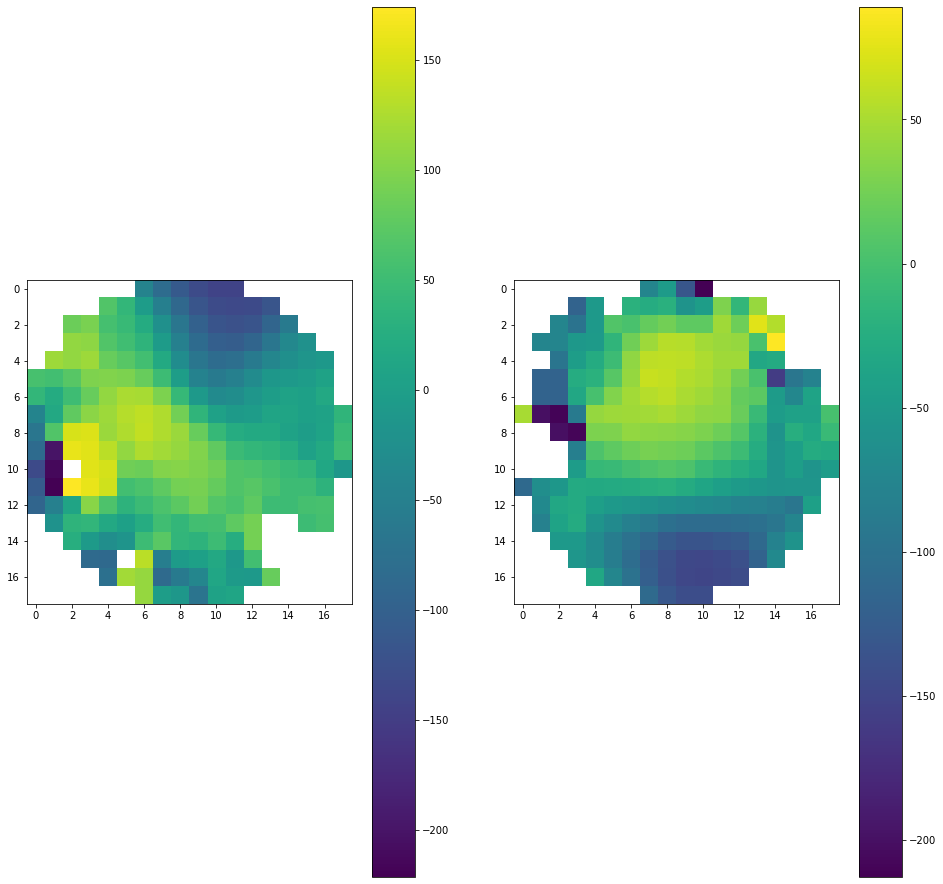

In [15]:
#Moment 1 for S1 and S2 usimg casa - Threshold at 1mJy

#ctask.immoments(imagename=cubeim,moments=[1],axis='spectral',chans='21~41',outfile=path+'g1s1-mom1',region='circle[[14h03m26.09s, -06d01m01.75s], 126arcsec]',includepix = [0.001,30])
#ctask.exportfits(imagename=path+'g1s1-mom1', fitsimage=path+'g1s1m1.fits', overwrite=True)

plt.figure(figsize=(16,16))
g1s1m1=plt.subplot(1,2,1)
mom1s1plt=g1s1m1.imshow(fits.getdata(path+'g1s1m1.fits')[0,0,:,:])
plt.colorbar(mom1s1plt,ax=g1s1m1)

#ctask.immoments(imagename=cubeim,moments=[1],axis='spectral',chans='21~41',outfile=path+'g1s2-mom1',region='circle[[14h03m25.15795s,-006d05m02.4656s], 126arcsec]',includepix = [0.001,30])
#ctask.exportfits(imagename=path+'g1s2-mom1', fitsimage=path+'g1s2m1.fits', overwrite=True)

g1s2m1=plt.subplot(1,2,2)
mom1s2plt=g1s2m1.imshow(fits.getdata(path+'g1s2m1.fits')[0,0,:,:])
plt.colorbar(mom1s2plt,ax=g1s2m1)


#Fix axis with wcs projection slice

In [16]:
print(mom0_new.unit)

Jy km / (beam s)
